# K-means clustering

## Preparation

In [39]:
import pandas as pd
import pickle as pkl
from sklearn.cluster import MiniBatchKMeans
#from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#from sklearn.cluster import SpectralClustering
#from sklearn import preprocessing

### Import GO data

In [4]:
with open('../processed_data/geneOntologyDataset.pkl', 'rb') as inp:
    [pivoted, tfidfPivoted] = pkl.load(inp)

In [5]:
GOdata = pd.DataFrame(tfidfPivoted['P'].todense()) # F / P / C
GOdata['Standard Name'] = pivoted['P'].index

### Import FI data

In [6]:
FIdata = pd.read_excel('../raw_data/41592_2018_45_MOESM4_ESM.xlsx', skiprows = 6, engine = 'openpyxl')
full_data = pd.merge(GOdata, FIdata, on = 'Standard Name', how = 'left')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [7]:
full_data = full_data.loc[full_data.intensity.notna()]

In [24]:
clust_data = full_data.iloc[:,0:full_data.columns.get_loc('Standard Name')]

## Clustering

### Get optimal number of clusters

In [21]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(18.5, 10.5)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters
Fit 52 clusters
Fit 54 clusters
Fit 56 clusters
Fit 58 clusters
Fit 60 clusters
Fit 62 clusters
Fit 64 clusters
Fit 66 clusters
Fit 68 clusters
Fit 70 clusters
Fit 72 clusters
Fit 74 clusters
Fit 76 clusters
Fit 78 clusters
Fit 80 clusters
Fit 82 clusters
Fit 84 clusters
Fit 86 clusters
Fit 88 clusters
Fit 90 clusters
Fit 92 clusters
Fit 94 clusters
Fit 96 clusters
Fit 98 clusters
Fit 100 clusters


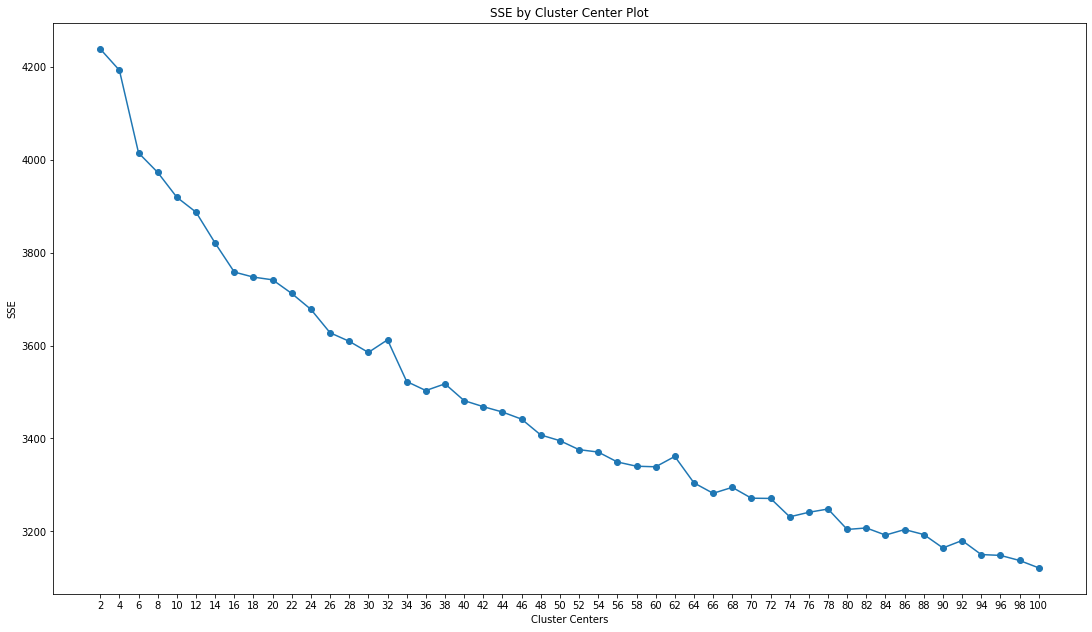

In [23]:
find_optimal_clusters(clust_data, 100)

### Perform clustering with optimal K

In [25]:
clusters = MiniBatchKMeans(n_clusters=16, init_size=1024, batch_size=2048, random_state=20).fit_predict(clust_data)

### Plotting the clusters: PCA

In [66]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(clust_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

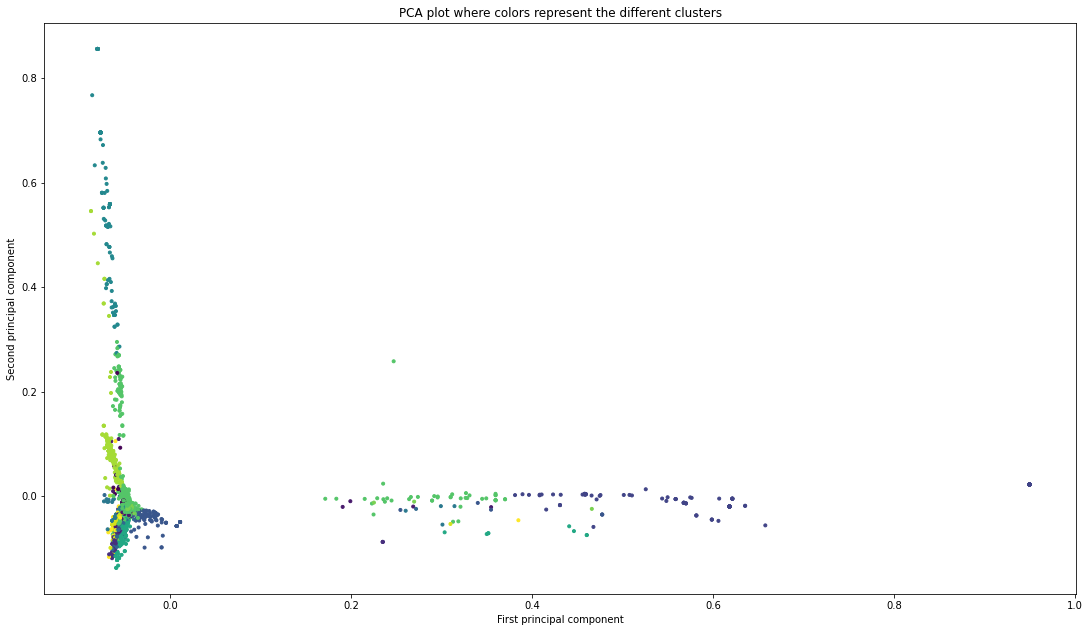

In [71]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(principalDf.PC1, principalDf.PC2, marker = '.', c = clusters)
ax.set_xlabel("First principal component")
ax.set_ylabel("Second principal component")
ax.set_title('PCA plot where colors represent the different clusters')
plt.show()

### plot FI in PC plot

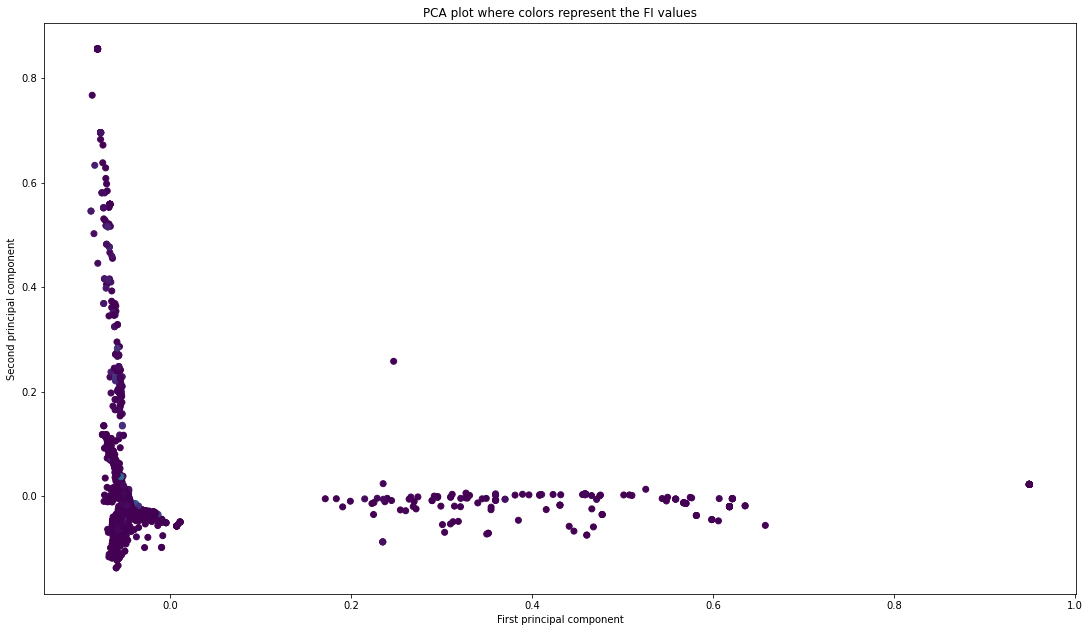

In [73]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(principalDf.PC1, principalDf.PC2, c = full_data.intensity)
ax.set_xlabel("First principal component")
ax.set_ylabel("Second principal component")
ax.set_title('PCA plot where colors represent the FI values')
plt.show()

In [40]:
full_data.intensity.max()

34.7025481019241

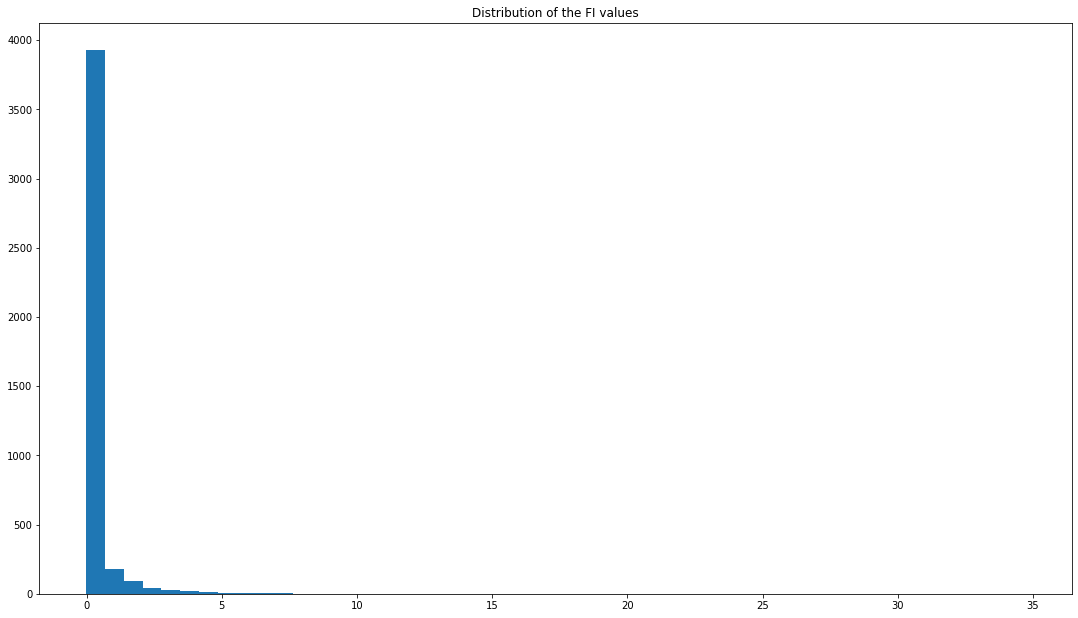

In [74]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.hist(full_data.intensity, bins = 50)
ax.set_title('Distribution of the FI values')
plt.show()

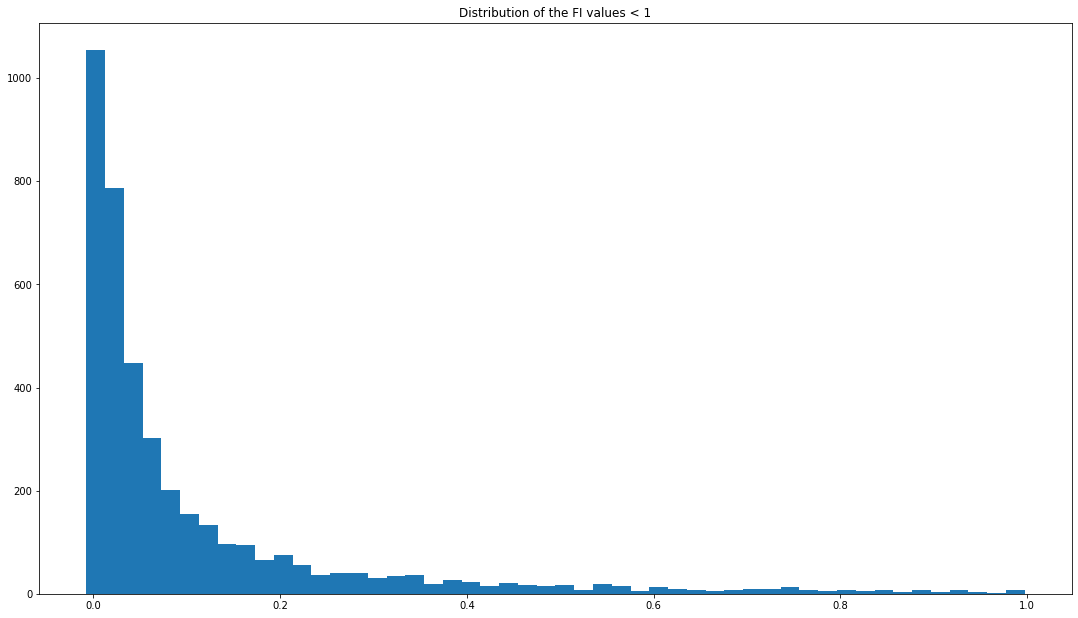

In [75]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.hist(full_data.intensity[full_data.intensity < 1], bins = 50)
ax.set_title('Distribution of the FI values < 1')
plt.show()

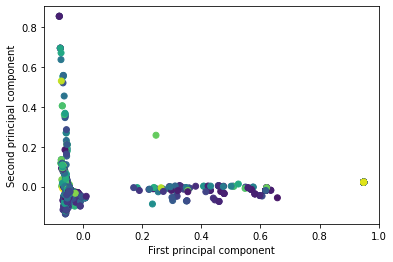

In [43]:
fig, ax = plt.subplots()
ax.scatter(principalDf.PC1.loc[full_data.intensity < 0.1], principalDf.PC2.loc[full_data.intensity < 0.1], 
           c = full_data.intensity.loc[full_data.intensity < 0.1])
ax.set_xlabel("First principal component")
ax.set_ylabel("Second principal component")
plt.show()

### Plotting the clusters: t-SNE

In [59]:
tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(clust_data))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


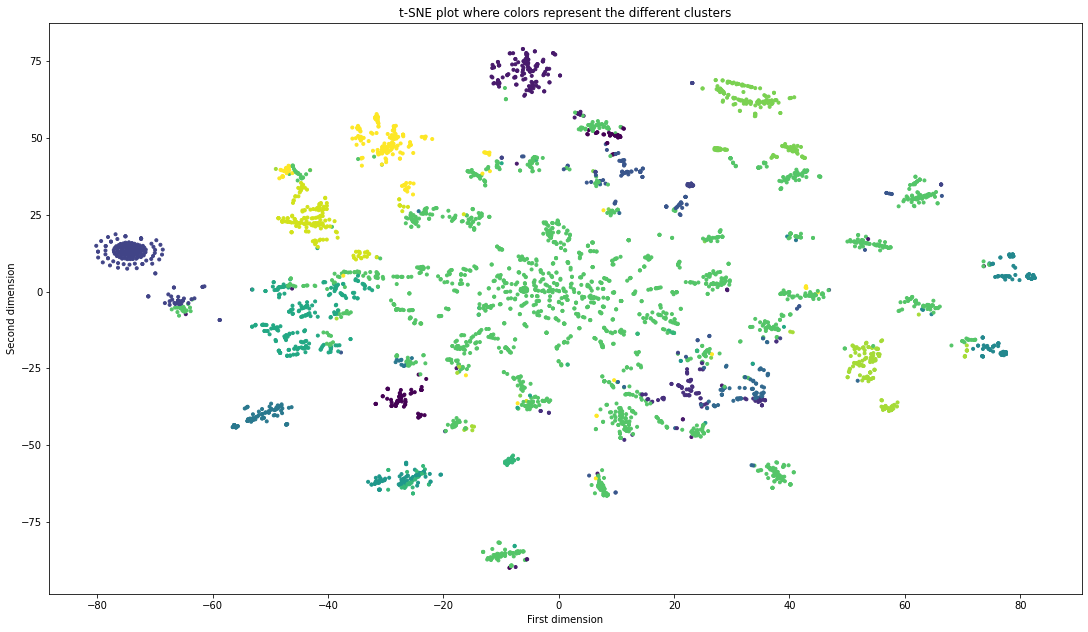

In [70]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(tsne[:,0], tsne[:,1], marker = '.', c = clusters)
ax.set_xlabel("First dimension")
ax.set_ylabel("Second dimension")
ax.set_title('t-SNE plot where colors represent the different clusters')
plt.show()

### plot FI in t-SNE plot

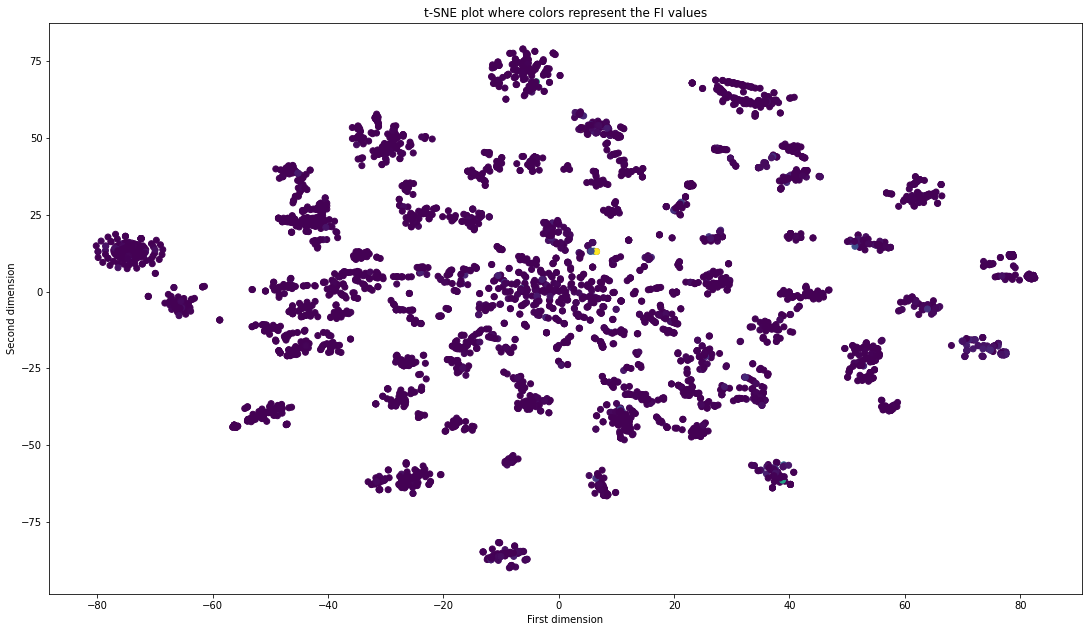

In [72]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(tsne[:,0], tsne[:,1], c = full_data.intensity)
ax.set_xlabel("First dimension")
ax.set_ylabel("Second dimension")
ax.set_title('t-SNE plot where colors represent the FI values')
plt.show()

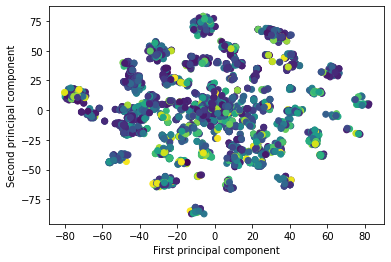

In [64]:
fig, ax = plt.subplots()
ax.scatter(tsne[:,0][full_data.intensity < 0.1], tsne[:,1][full_data.intensity < 0.1], 
           c = full_data.intensity.loc[full_data.intensity < 0.1])
ax.set_xlabel("First dimension")
ax.set_ylabel("Second dimension")
plt.show()